# Задание
1 Загрузите файл HR.csv в pandas dataframe 
2 Рассчитайте основные статистики для переменных
(среднее,медиана,мода,мин/макс,сред.отклонение)
3 Рассчитайте и визуализировать корреляционную матрицу для
количественных переменных.
Определите две самые скоррелированные и две наименее
скоррелированные переменные
4 Рассчитайте сколько сотрудников работает в каждом
департаменте.
5 Показать распределение сотрудников по зарплатам. 
6 Показать распределение сотрудников по зарплатам в каждом
департаменте по отдельности
7 Проверить гипотезу, что сотрудники с высоким окладом
проводят на работе больше времени, чем сотрудники с низким
окладом
8 Рассчитать следующие показатели среди уволившихся и не
уволившихся сотрудников (по отдельности):
● Доля сотрудников с повышением за последние 5 лет
● Средняя степень удовлетворенности
● Среднее количество проектов
9 Разделить данные на тестовую и обучающую выборки
Построить модель LDA, предсказывающую уволился ли
сотрудник на основе имеющихся факторов (кроме department и
salary)
Оценить качество модели на тестовой выборки
10 Загрузить jupyter notebook с решение на github и прислать ссылку


1. satisfaction_level - Уровень удовлетворенности работой
2. Last_evaluation - Время с момента последней оценки в годах
3. number_projects - Количество проектов, выполненных за время работы
4. average_monthly_hours - Среднее количество часов на рабочем месте в месяц
5. time_spend_company - Стаж работы в компании в годах
6. work_accident - Происходили ли несчастные случаи на рабочем месте с сотрудником
7. left - уволился ли сотрудник
8. promotion_last_5years - повышался ли сотрудник за последние пять лет
9. department - отдел в котором работает сотрудник
10. salary - относительный уровень зарплаты

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as st

In [2]:
# 1 Загрузите файл HR.csv в pandas dataframe 

df = pd.read_csv('HR.csv') 
df.head(10)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
5,0.41,0.50,2,153,3,0,1,0,sales,low
6,0.10,0.77,6,247,4,0,1,0,sales,low
7,0.92,0.85,5,259,5,0,1,0,sales,low
8,0.89,1.00,5,224,5,0,1,0,sales,low
9,0.42,0.53,2,142,3,0,1,0,sales,low


In [3]:
# 2 Рассчитайте основные статистики для переменных
# (среднее,медиана,мода,мин/макс,сред.отклонение)

df.describe()
# пропусков нет

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


In [4]:
print('Значение моды: ', df['satisfaction_level'].mode())
print('Значение моды: ', df['last_evaluation'].mode())
print('Значение моды: ', df['number_project'].mode())
print('Значение моды: ', df['average_montly_hours'].mode())
print('Значение моды: ', df['time_spend_company'].mode())
print('Значение моды: ', df['Work_accident'].mode())
print('Значение моды: ', df['left'].mode())
print('Значение моды: ', df['promotion_last_5years'].mode())

Значение моды:  0    0.1
Name: satisfaction_level, dtype: float64
Значение моды:  0    0.55
Name: last_evaluation, dtype: float64
Значение моды:  0    4
Name: number_project, dtype: int64
Значение моды:  0    135
1    156
Name: average_montly_hours, dtype: int64
Значение моды:  0    3
Name: time_spend_company, dtype: int64
Значение моды:  0    0
Name: Work_accident, dtype: int64
Значение моды:  0    0
Name: left, dtype: int64
Значение моды:  0    0
Name: promotion_last_5years, dtype: int64


In [5]:
# 3 Рассчитайте и визуализировать корреляционную матрицу для
# количественных переменных.
# Определите две самые скоррелированные и две наименее
# скоррелированные переменные

df_quantity = df.loc[:, ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company']]
df_quantity.corr()


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000


<Axes: >

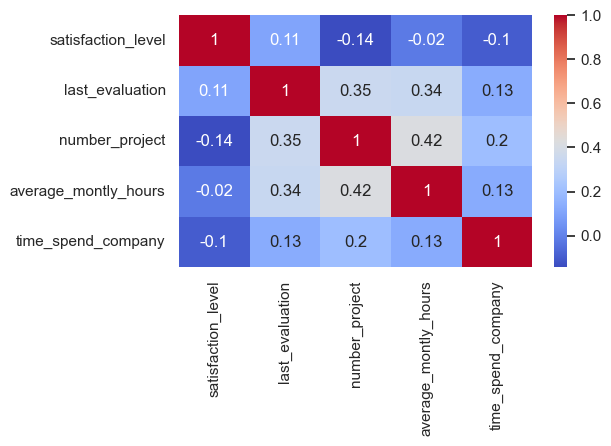

In [8]:
sns.set(rc={'figure.figsize':(5.7, 3.27)})
sns.heatmap(df_quantity.corr(), annot=True, cmap='coolwarm')

# две самые скоррелированные -  количество выполненных проектов и cреднее количество часов на рабочем месте
# две наименее скоррелированные - cреднее количество часов на рабочем месте и удовлетворенность работой

In [6]:
# 4 Рассчитайте сколько сотрудников работает в каждом департаменте.

df_dep = df.loc[:, ['department']]

for col_name, data in df_dep.items():
  print(data.value_counts())

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: department, dtype: int64


Text(0.5, 1.0, 'Распределение сотрудников по зарплатам')

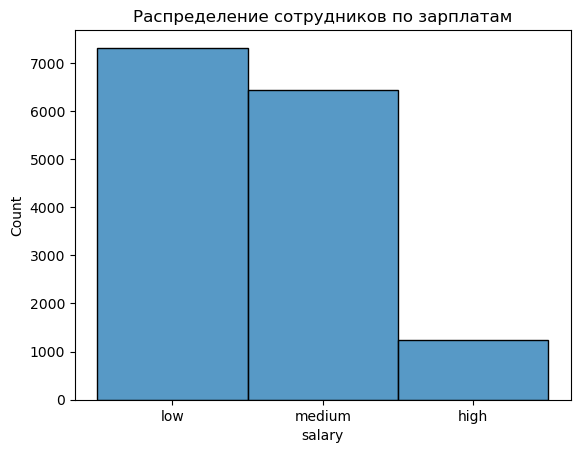

In [7]:
# 5 Показать распределение сотрудников по зарплатам. 

sns.histplot(df['salary'])
plt.title('Распределение сотрудников по зарплатам')

<Axes: title={'center': 'Распределение ЗП по департаментам'}, xlabel='department'>

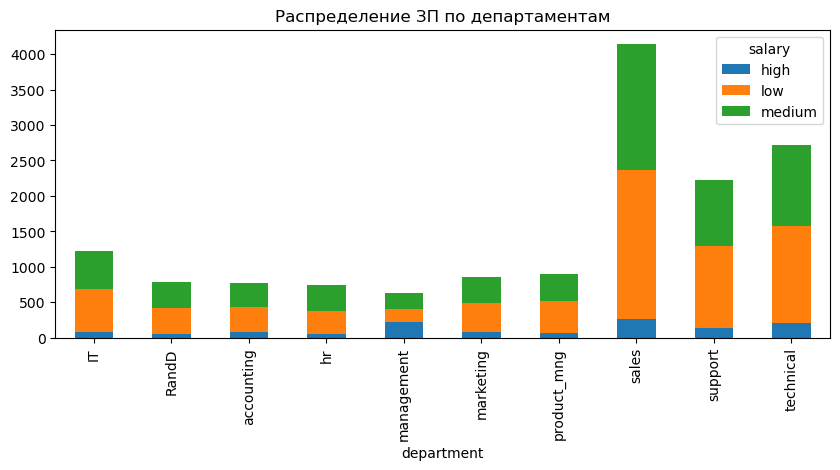

In [8]:
# 6 Показать распределение сотрудников по зарплатам в каждом департаменте по отдельности

# группируем по зп и подразделению, считая кол-во строк, убираем зп в столбцы
df_dep_sal = df.groupby(['salary', 'department']).agg({'number_project': 'count'}).assign().pivot_table(index='department', columns='salary', values='number_project', aggfunc='sum')

df_dep_sal.plot(kind='bar', stacked= True, title='Распределение ЗП по департаментам', figsize=(10, 4))


In [9]:
# 7 Проверить гипотезу, что сотрудники с высоким окладом
# проводят на работе больше времени, чем сотрудники с низким окладом

df_low = df[df.salary == 'low'].loc[:, ['average_montly_hours']]
df_high = df[df.salary == 'high'].loc[:, ['average_montly_hours']]

stat, p = st.ttest_ind(df_high,df_low)

# H0 - среднее время проводенное на работе не зависит от уровня ЗП
# H1 - сотрудники с большим окладом проводят на работе больше времени
# 5% - уровень значимости

print(p[0])

if p[0] > 0.05:
    print('Время проводенное на работе не зависит от уровня ЗП')
else:
    print('Сотрудники с большим окладом проводят на работе больше времени')
    



0.4661023478267259
Время проводенное на работе не зависит от уровня ЗП


<Axes: ylabel='Count'>

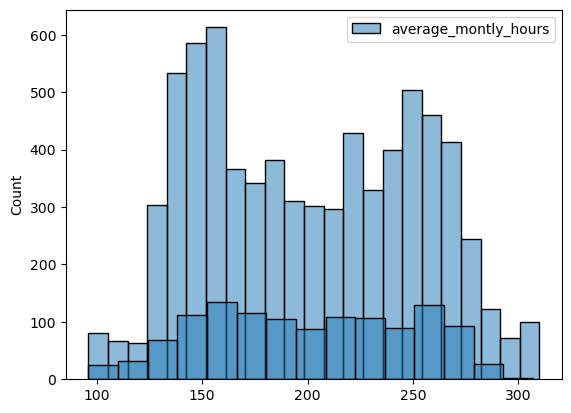

In [10]:
sns.histplot(df_low)
sns.histplot(df_high)
# на гистограммах тоже видим, что выборки не особенно смещены относительно друг друга

In [65]:
# 8 Рассчитать следующие показатели среди уволившихся и не
# уволившихся сотрудников (по отдельности):
# ● Доля сотрудников с повышением за последние 5 лет
# ● Средняя степень удовлетворенности
# ● Среднее количество проектов

df_g= df.groupby(['left']).agg({'promotion_last_5years': 'count','satisfaction_level': 'mean','number_project': 'mean'})
# поделим повышенных на общее кол-во строк, чтобы получилть долю
df_g['promotion_last_5years'] = df_g.promotion_last_5years / df.promotion_last_5years.count()
df_g


,promotion_last_5years,satisfaction_level,number_project
left,,,
0,0.761917,0.666810,3.786664
1,0.238083,0.440098,3.855503


In [52]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [49]:
# 9 Разделить данные на тестовую и обучающую выборки
# Построить модель LDA, предсказывающую уволился ли
# сотрудник на основе имеющихся факторов (кроме department и
# salary)
# Оценить качество модели на тестовой выборке

data = df[['satisfaction_level',
           'last_evaluation',
           'number_project',
           'average_montly_hours',
           'time_spend_company',
           'Work_accident',
           'promotion_last_5years']]
data_class = df['left']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, random_state=42)

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [51]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.7536

Получили точность предсказания модели LDA на тестовой выборке - 75%